In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from utilities import visualize_classifier

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
input_file = "data_multivar_nb.txt"
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [5]:
classifier = GaussianNB()
classifier.fit(X, y)
y_pred = classifier.predict(X)

In [4]:
accuracy = (y==y_pred).sum() / X.shape[0] * 100.0
print("Accuracy :", round(accuracy, 2), "%")

Accuracy : 99.75 %


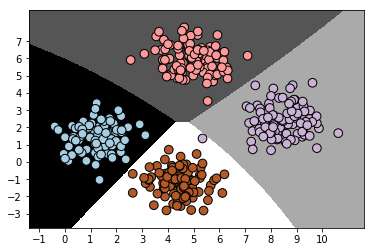

In [11]:
visualize_classifier(classifier, X, y)

In [12]:
X_train, X_test,  Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, Y_train)
Y_test_pred = classifier_new.predict(X_test)

In [13]:
accuracy = (Y_test == Y_test_pred).sum() / X_test.shape[0] * 100.0
print("Accuracy :", round(accuracy, 2), "%")

Accuracy : 100.0 %


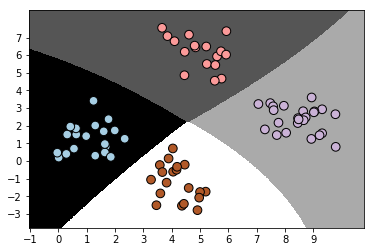

In [14]:
visualize_classifier(classifier_new, X_test, Y_test)

In [15]:
num_folds = 3
accuracy_values = cross_validation.cross_val_score(classifier, X, y, scoring='accuracy', cv=num_folds)
print("Accuracy : "+str(round(100*accuracy_values.mean(), 2)) + "%")

Accuracy : 99.75%


In [16]:
precision_values = cross_validation.cross_val_score(classifier, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision :"+str(round(100*precision_values.mean(),2)) +"%")

Precision :99.76%


In [18]:
recall_values = cross_validation.cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall : "+str(round(100*recall_values.mean(),2)) +"%")

Recall : 99.75%
